In [4]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import time
import numpy as np
import defmod as dm
import defmod.multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt
import defmod.registrationdata as regdata
import defmod.hamiltonian_multishape as hamiltonian
from defmod.energyfunctional import EnergyFunctional_unconstrained, EnergyFunctional
from defmod import optimize
import defmod.save_res as results



torch.set_default_tensor_type(torch.DoubleTensor)

In [5]:
data1 = regdata.Nut_translated(source_transvec=[0.,0.], target_transvec=[-1.,0.], reflect_target=-1., undersample=2)
data1()
data2 = regdata.Nut_translated(source_transvec=[1.3,2.], target_transvec=[1.5,2.], reflect_target=1., undersample=2)
data2()
source = [*data1.source, *data2.source]
target = [*data1.target, *data2.target]
module_list = [*data1.modules, *data2.modules]
reduce_background = False

<Figure size 432x288 with 0 Axes>

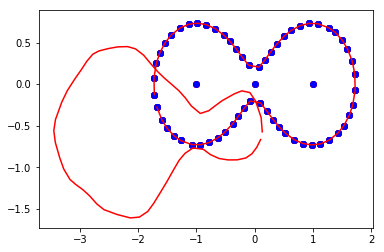

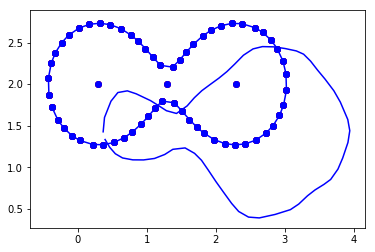

In [6]:
plt.figure()
c = ['r', 'b']
for i in range(2):
    plt.figure()
    plt.plot(source[i].detach().numpy()[:,0], source[i].detach().numpy()[:,1], c=c[i])
    for j in range(5):
        plt.scatter(module_list[i][j].manifold.gd.view(-1,2).detach().numpy()[:,0],module_list[i][j].manifold.gd.view(-1,2).detach().numpy()[:,1], c=c[i])

    plt.plot(target[i].detach().numpy()[:,0], target[i].detach().numpy()[:,1], c=c[i])


    for gd in module_list[i].manifold.gd:
        plt.scatter(gd.view(-1,2).detach().numpy()[:,0],gd.view(-1,2).detach().numpy()[:,1], c='r')
    for gd in module_list[i].manifold.gd:
        plt.scatter(gd.view(-1,2).detach().numpy()[:,0],gd.view(-1,2).detach().numpy()[:,1], c='b')

#plt.show()

<Figure size 432x288 with 0 Axes>

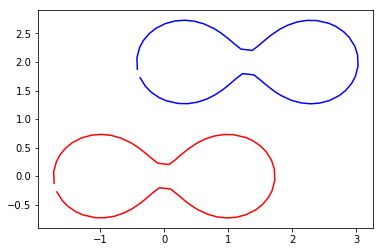

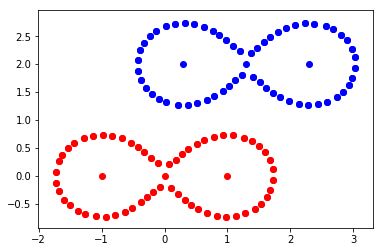

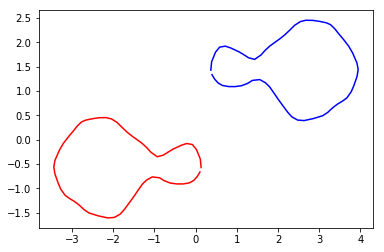

In [7]:
plt.figure()
c = ['r', 'b']

plt.figure()
for i in range(2):
    plt.plot(source[i].detach().numpy()[:,0], source[i].detach().numpy()[:,1], c=c[i])
    
plt.figure()
for i in range(2):
    for j in range(5):
        plt.scatter(module_list[i][j].manifold.gd.view(-1,2).detach().numpy()[:,0],module_list[i][j].manifold.gd.view(-1,2).detach().numpy()[:,1], c=c[i])

plt.figure()        
for i in range(2):
    plt.plot(target[i].detach().numpy()[:,0], target[i].detach().numpy()[:,1], c=c[i])

plt.show()

In [32]:
sigma_bg = 0.3
modules = dm.multishape.MultiShapeModule(module_list, sigma_bg)

constr = dm.constraints.Identity_Silent()
H = dm.hamiltonian_multishape.Hamiltonian_multi(modules, constr)
def attach(modules, target):
    
    return sum([dm.attachement.VarifoldAttachement([1, 0.2])([modules.module_list[i][0].manifold.gd.view(-1,2)], [target[i]]) for i in range(2)])
E = EnergyFunctional_unconstrained(H.module, H, source, target, dim=2, gamma=1e-3, attach=attach)

In [33]:
attach(H.module, target)

tensor(38.9986, grad_fn=<AddBackward0>)

In [34]:
gd0_tensor = torch.cat(H.module.manifold.unroll_gd().copy(),0).requires_grad_().view(-1)
mom0_tensor = torch.cat(H.module.manifold.unroll_cotan().copy(),0).requires_grad_().view(-1)
    
    
gd0_tensor_init = gd0_tensor.clone()
gd0_tensor.retain_grad()
mom0_tensor.retain_grad()
X = [gd0_tensor, mom0_tensor]

from defmod import optimize
tic = time.time()
X[1], iter_states = optimize.BFGS(E, X, disp=True)(maxiter=500)
toc=time.time()

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)
../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


cost: 0.0 attach: 38.998647609359494
cost: 0.0 attach: 38.998647609359494
cost: 0.0048237164739452915 attach: 24.366850472211205
cost: 0.0048237164739452915 attach: 24.366850472211205
cost: 0.037843768781580946 attach: 11.583686316777822
cost: 0.037843768781580946 attach: 11.583686316777822
cost: 0.10239158898021797 attach: 1.5950202233760895e+29
cost: 0.10239158898021797 attach: 1.5950202233760895e+29
cost: 0.037843768781580946 attach: 11.583686316777822
cost: 0.037843768781580946 attach: 11.583686316777822
cost: 0.037843768781580946 attach: 11.583686316777822
cost: 0.037843768781580946 attach: 11.583686316777822


../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)
../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


cost: 0.10239158898021797 attach: 1.5950202233760895e+29
cost: 0.06332871396196318 attach: 30.72619073993959
cost: 0.05332507336429438 attach: 15.201472428000448
cost: 0.04337251253571676 attach: 10.984972420585478
cost: 0.04337251253571676 attach: 10.984972420585478


../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)
../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


cost: 0.04443198220740607 attach: 10.059889652337489
cost: 0.04443198220740607 attach: 10.059889652337489
cost: 0.04455083200188202 attach: 8.86935849249847
cost: 0.04455083200188202 attach: 8.86935849249847
cost: 0.04358137110007581 attach: 6.982306772366232
cost: 0.04358137110007581 attach: 6.982306772366232
cost: 0.04245724347369305 attach: 7.135634104261623
cost: 0.04245724347369305 attach: 7.135634104261623
cost: 0.0428896959695707 attach: 6.105988626613195
cost: 0.0428896959695707 attach: 6.105988626613195
cost: 0.04303395872560365 attach: 5.061759735419218
cost: 0.04303395872560365 attach: 5.061759735419218
cost: 0.04252805316229891 attach: 3.3295623467587054
cost: 0.04252805316229891 attach: 3.3295623467587054
cost: 0.04146785162613499 attach: 3.3048968352383596
cost: 0.04146785162613499 attach: 3.3048968352383596
cost: 0.04187009697391325 attach: 2.475085220364602
cost: 0.04187009697391325 attach: 2.475085220364602
cost: 0.040715880589122136 attach: 1.6283418481345873
cost: 0.

cost: 0.03147273402571054 attach: 0.004176326364090599
cost: 0.03141189774685537 attach: 0.004091152050976987
cost: 0.03141189774685537 attach: 0.004091152050976987
cost: 0.03134887633361404 attach: 0.0040156219835854046
cost: 0.03134887633361404 attach: 0.0040156219835854046
cost: 0.031304355154437864 attach: 0.003959350802816175
cost: 0.031304355154437864 attach: 0.003959350802816175
cost: 0.03126937872480381 attach: 0.00391901831479835
cost: 0.03126937872480381 attach: 0.00391901831479835
cost: 0.03124242815410768 attach: 0.0038960028495633736
cost: 0.03124242815410768 attach: 0.0038960028495633736
cost: 0.031213801484036043 attach: 0.0038614475556215666
cost: 0.031213801484036043 attach: 0.0038614475556215666
cost: 0.031138124220384852 attach: 0.0038719709007430936
cost: 0.031138124220384852 attach: 0.0038719709007430936
cost: 0.03112349612302301 attach: 0.0038131810783106346
cost: 0.03112349612302301 attach: 0.0038131810783106346
cost: 0.031077257159415676 attach: 0.00378632992114

In [35]:
H.module.manifold.fill_gd(X[0])
H.module.manifold.fill_cotan(X[1])
H.geodesic_controls()

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)
../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


In [13]:
import defmod.save_res as results

In [ ]:
H.module.manifold.fill_gd(X[0])
H.module.manifold.fill_cotan(X[1])
H.geodesic_controls()
save = results.Save_Results_MultiShape(H, source, target, E, iter_states=iter_states, time=toc-tic)

xlim = [-4.5, 5.5]
ylim = [-2.5,3.5]
d = [0.2, 0.2]
_ = save.gridpoints(xlim, ylim, d)

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)
../defmod/multishape_silentpoints.py:221: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


PicklingError: Can't pickle <function attach at 0x7f9eb8bd6488>: it's not the same object as __main__.attach

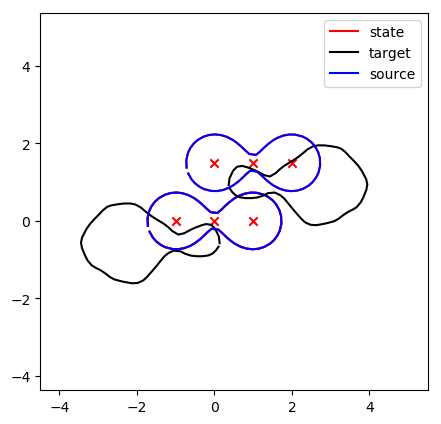

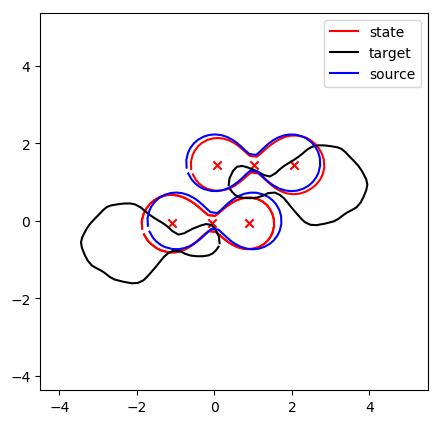

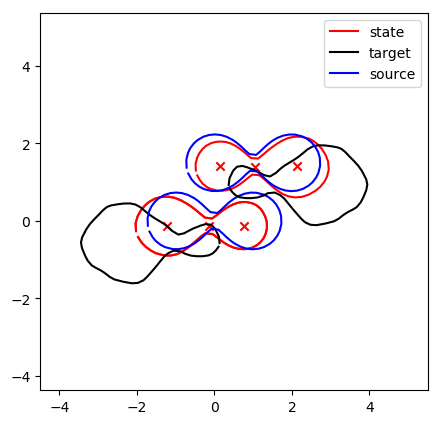

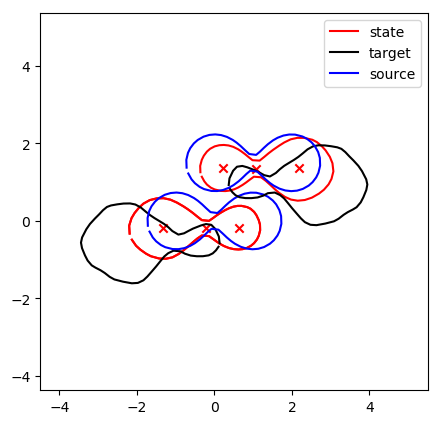

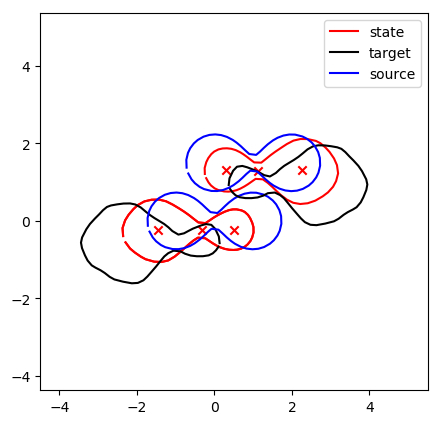

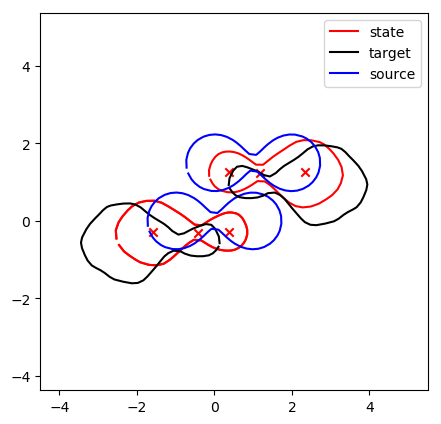

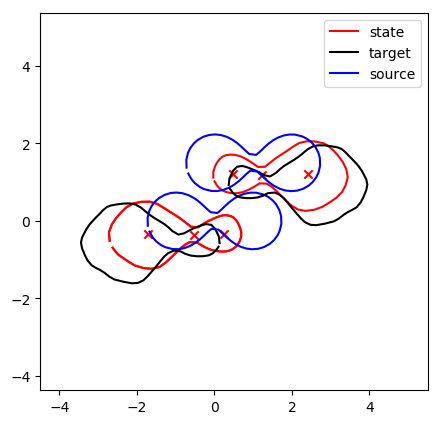

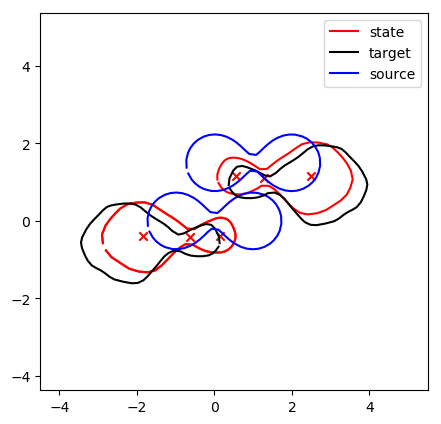

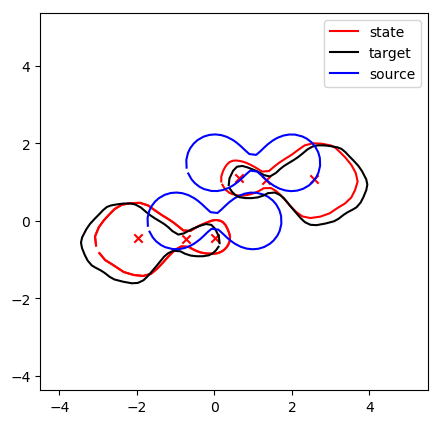

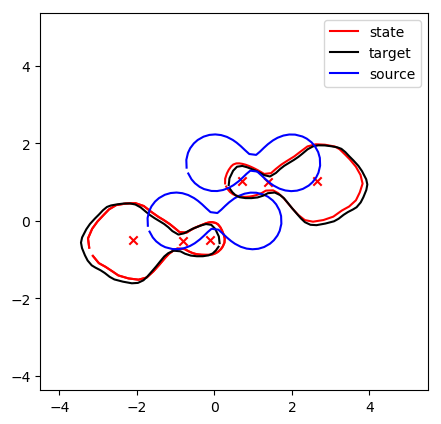

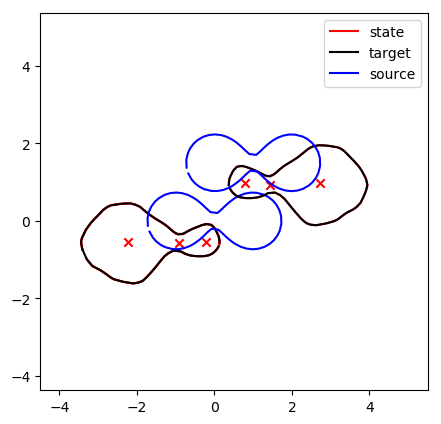

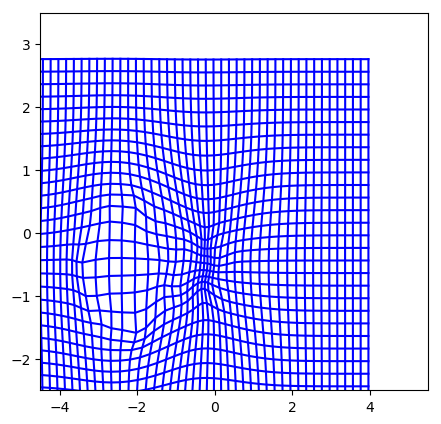

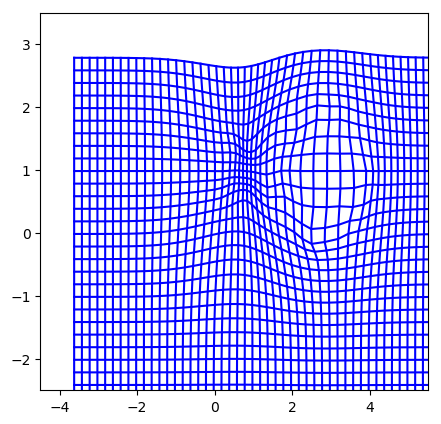

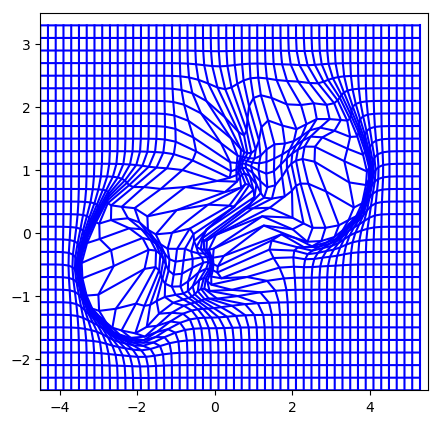

<Figure size 432x288 with 0 Axes>

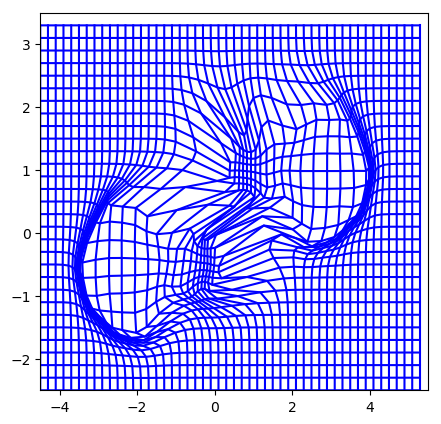

In [86]:
#fig_states = save.fig_states(show=True)
#fig_grid1, fig_grid2, fig_grid_bg, fig_multigrid = save.fig_grid(True)

save.save('../results/Nuts-Multi/MultiShapeDefmod/', axeslim=[xlim, ylim] , plot_gd=['plot', 'scatter', 'scatter', 'scatter', None])
plt.close('all')

In [8]:
gd0 = torch.cat([data1.modules[0][i].manifold.gd.clone() for i in [1,2,3]]).view(-1)
gd1= torch.cat([data2.modules[0][i].manifold.gd.clone() for i in [1,2,3]]).view(-1)
silent_gd0 = dm.deformationmodules.SilentPoints(dm.manifold.Landmarks(2, 3, gd=gd0))
silent_gd1 = dm.deformationmodules.SilentPoints(dm.manifold.Landmarks(2, 3, gd=gd1))

In [9]:
## LDDMM Multishape Module
sigma1 = 0.5
manifold1 = dm.manifold.Landmarks(2, len(source[0]), gd=source[0].view(-1))
silent1 = dm.deformationmodules.SilentPoints(manifold1.copy())
trans1 = dm.deformationmodules.Translations(manifold1, sigma1)

mod1 = dm.deformationmodules.CompoundModule([silent1, trans1])

sigma2 = 0.5
manifold2 = dm.manifold.Landmarks(2, len(source[1]), gd=source[1].view(-1))
silent2 = dm.deformationmodules.SilentPoints(manifold2.copy())
trans2 = dm.deformationmodules.Translations(manifold2, sigma2)

mod2 = dm.deformationmodules.CompoundModule([silent2, trans2])

module_list = [mod1, mod2]
sigma_bg = 0.2
multi_LDDMM = dm.multishape.MultiShapeModule(module_list, sigma_bg)

constr = dm.constraints.Identity_Silent()
H_multi_LDDMM = dm.hamiltonian_multishape.Hamiltonian_multi(multi_LDDMM, constr)

In [10]:
def attach(modules, target):
    return sum([dm.attachement.VarifoldAttachement([1, 0.2])([modules.module_list[i][0].manifold.gd.view(-1,2)], [target[i]]) for i in range(2)])


In [11]:
Energy_multi_LDDMM = EnergyFunctional(multi_LDDMM, H_multi_LDDMM, constr, source, target, dim=2, gamma=1e-3, attach = attach)
gd0 = torch.cat(multi_LDDMM.manifold.unroll_gd())
mom0 = torch.cat(multi_LDDMM.manifold.unroll_cotan())
X_multi_LDDMM = [gd0, mom0]

tic=time.time()
X_multi_LDDMM[1], iter_states = dm.optimize.BFGS(Energy_multi_LDDMM, X_multi_LDDMM, disp=True)(maxiter=500)
toc=time.time()

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)
../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


cost: 0.0 attach: 36.63459899408754
cost: 0.0 attach: 36.63459899408754
cost: 0.003295144862497172 attach: 23.677971405069652
cost: 0.003295144862497172 attach: 23.677971405069652
cost: 22190125792672.754 attach: 2684466.9357312433
cost: 22190125792672.754 attach: 2684466.9357312433
cost: 0.008204705544781426 attach: 15.915802755328418
cost: 0.008204705544781426 attach: 15.915802755328418
cost: 1.0803374259706136e+27 attach: 7.9621607773814e+28
cost: 1.0803374259706136e+27 attach: 7.9621607773814e+28
cost: 0.008204705544781426 attach: 15.915802755328418
cost: 0.008204705544781426 attach: 15.915802755328418
cost: 0.008204705544781426 attach: 15.915802755328418
cost: 0.008204705544781426 attach: 15.915802755328418


../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)
../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


cost: 1.0803374259706136e+27 attach: 7.9621607773814e+28
cost: 0.14528401396963875 attach: 9.661223957938734
cost: 0.14528401396963875 attach: 9.661223957938734
cost: 0.14528401396963875 attach: 9.661223957938734
cost: 0.14528401396963875 attach: 9.661223957938734
cost: 0.14528401396963875 attach: 9.661223957938734
cost: 0.14528401396963875 attach: 9.661223957938734
cost: 0.14528401396963875 attach: 9.661223957938734
cost: 0.14528401396963875 attach: 9.661223957938734
cost: 0.14528401396963875 attach: 9.661223957938734
cost: 0.14528401396963875 attach: 9.661223957938734
cost: 0.14528401396963875 attach: 9.661223957938734
cost: 0.14528401396963875 attach: 9.661223957938734
         Current function value: 15.924007
         Iterations: 2
         Function evaluations: 19
         Gradient evaluations: 8


In [15]:
H_multi_LDDMM.module.manifold.fill_gd(X_multi_LDDMM[0])
H_multi_LDDMM.module.manifold.fill_cotan(X_multi_LDDMM[1])
H_multi_LDDMM.geodesic_controls()
save = results.Save_Results_MultiShape(H_multi_LDDMM, source, target, Energy_multi_LDDMM, time=toc-tic, iter_states=iter_states)

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)
../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)
../defmod/multishape_silentpoints.py:221: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


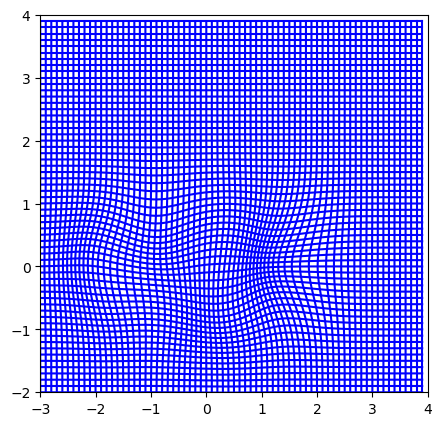

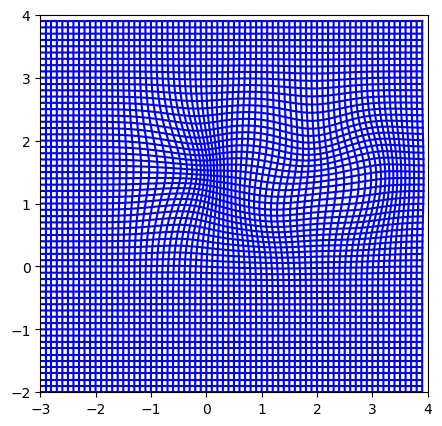

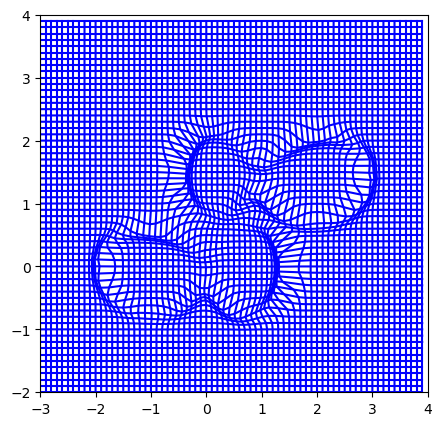

<Figure size 432x288 with 0 Axes>

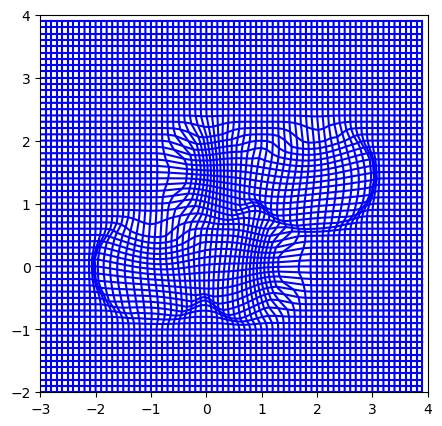

In [17]:
xlim = [-3, 4]
ylim = [-2,4]
d = [0.1, 0.1]
_ = save.gridpoints(xlim, ylim, d)
save.fig_grid(True)
save.save('../results/Nuts-Multi/MultiShapeLDDMM/',axeslim=[xlim, ylim] , plot_gd=['plot', 'scatter', None])
plt.close('all')

In [54]:
toc-tic


488.6221947669983

In [118]:
## LDDMM Module

manifold1 = dm.manifold.Landmarks(2, len(source[0]), gd=source[0].view(-1))
manifold2 = dm.manifold.Landmarks(2, len(source[1]), gd=source[1].view(-1))
translations = [dm.deformationmodules.Translations(man, sigma=0.3) for man in [manifold1, manifold2]]
module_LDDMM = dm.deformationmodules.CompoundModule([*translations, silent_gd0, silent_gd1])
H_LDDMM = dm.hamiltonian.Hamiltonian([module_LDDMM])

def attach(modules, target): 
    return sum([dm.attachement.VarifoldAttachement([1, 0.2])([modules.module_list[i].manifold.gd.view(-1,2)], [target[i]]) for i in range(2)])


reg_param = 1e-3
Energy_LDDMM = EnergyFunctional_unconstrained(module_LDDMM, H_LDDMM, source, target, dim=2, gamma=reg_param, attach=attach)
gd0 = torch.cat(module_LDDMM.manifold.unroll_gd())
mom0 = torch.cat(module_LDDMM.manifold.unroll_cotan())
X_LDDMM = [gd0, mom0]

tic=time.time()
X_LDDMM[1], iter_states = dm.optimize.BFGS(Energy_LDDMM, X_LDDMM, disp=True)(maxiter=2500)
toc=time.time()

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)


cost: 0.0 attach: 38.998647609359494
cost: 0.0 attach: 38.998647609359494
cost: 0.0031811301325177068 attach: 37.57002396605616
cost: 0.0031811301325177068 attach: 37.57002396605616
cost: 2.4140836062904556e-05 attach: 37.19360186246416
cost: 2.4140836062904556e-05 attach: 37.19360186246416
cost: 0.00017427143805638754 attach: 33.68097111273934
cost: 0.00017427143805638754 attach: 33.68097111273934
cost: 0.00236641452812784 attach: 23.53644511403291
cost: 0.00236641452812784 attach: 23.53644511403291
cost: 0.014121564215290015 attach: 27.307383168192537
cost: 0.014121564215290015 attach: 27.307383168192537
cost: 0.006649235765366539 attach: 14.706533485481527
cost: 0.006649235765366539 attach: 14.706533485481527
cost: 0.016937371154256732 attach: 248.3280083321803
cost: 0.016937371154256732 attach: 248.3280083321803
cost: 0.009195539871478996 attach: 12.01228517115124
cost: 0.009195539871478996 attach: 12.01228517115124
cost: 0.012258780883318752 attach: 11.318871736075558
cost: 0.0122

cost: 0.019562119007103466 attach: 2.1173534355568115
cost: 0.019562119007103515 attach: 2.0483128028940403
cost: 0.019562119007103515 attach: 2.0483128028940403
cost: 0.019562119007103515 attach: 2.0483128028940403
cost: 0.019562119007103515 attach: 2.0483128028940403
cost: 0.01956211900710347 attach: 2.1085244902510034
cost: 0.01956211900710347 attach: 2.1085244902510034
cost: 0.019562119007103515 attach: 2.0483128028940403
cost: 0.019562119007103515 attach: 2.0483128028940403
cost: 0.019562119007103515 attach: 2.0483128028940403
cost: 0.019562119007103515 attach: 2.0483128028940403
cost: 0.01956211900710345 attach: 856238.2243135662
cost: 0.01956211900710345 attach: 856238.2243135662
cost: 0.019562119007103515 attach: 2.0483128028940403
cost: 0.019562119007103515 attach: 2.0483128028940403


../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)


cost: 0.01951849303370795 attach: 2.0775753143588513
cost: 0.019545481988272634 attach: 2.0846772541120266
cost: 0.01955821958365841 attach: 1.9693607784219402
cost: 0.01955821958365841 attach: 1.9693607784219402


../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)


cost: 0.019479388383800908 attach: 627.4316395621674
cost: 0.019479388383800908 attach: 627.4316395621674
cost: 0.01955821914951136 attach: 2.0873010304144035
cost: 0.01955821914951136 attach: 2.0873010304144035
cost: 0.019558219583657867 attach: 2.195633575526191
cost: 0.019558219583657867 attach: 2.195633575526191
cost: 0.01955821958365841 attach: 1.9693607784219402
cost: 0.01955821958365841 attach: 1.9693607784219402
cost: 0.01955821958365841 attach: 1.9693607784219402
cost: 0.01955821958365841 attach: 1.9693607784219402
cost: 0.019558219583658186 attach: 1.9758129885284141
cost: 0.019558219583658186 attach: 1.9758129885284141
cost: 0.01955821958365841 attach: 1.9693607784219402
cost: 0.01955821958365841 attach: 1.9693607784219402
cost: 0.01955821958365841 attach: 1.9693607784219402
cost: 0.01955821958365841 attach: 1.9693607784219402
cost: 0.01955821958365828 attach: 2.0564734799346436
cost: 0.01955821958365828 attach: 2.0564734799346436
cost: 0.01955821958365841 attach: 1.96936077

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)


cost: 0.019479388383800908 attach: 627.4316395621674
cost: 0.019517129446596174 attach: 2.385813832249715
cost: 0.0195305296417378 attach: 2.1783030992804466
cost: 0.019555350024366095 attach: 2.0284645428902177
cost: 0.019556782909113044 attach: 2.0049320141193423
cost: 0.019557500772660944 attach: 2.098761430222238
cost: 0.019557860059728496 attach: 80190.57186755777
cost: 0.019558039792085598 attach: 2.0860828707000234
cost: 0.0195580997167287 attach: 2.089062041716897
cost: 0.019558159646903744 attach: 2.0810939014239747
cost: 0.019558189614458633 attach: 2.087851408888266
cost: 0.019558204598852914 attach: 2.09701030732351
         Current function value: 1.988919
         Iterations: 43
         Function evaluations: 113
         Gradient evaluations: 99


../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)


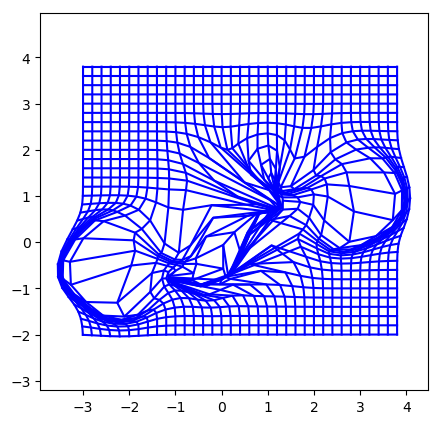

[<Figure size 500x500 with 1 Axes>]

In [119]:
H_LDDMM.module.manifold.fill_gd(X_LDDMM[0])
H_LDDMM.module.manifold.fill_cotan(X_LDDMM[1])
H_LDDMM.geodesic_controls()
save = results.Save_Results_SingleShape(H_LDDMM, source, target, Energy_LDDMM, time=toc-tic, iter_states=iter_states)

xlim = [-3, 4]
ylim = [-2,4]
d = [0.2, 0.2]
_ = save.gridpoints(xlim, ylim, d)
save.fig_grid(True)

In [122]:
save.save('../results/Nuts-Multi/LDDMM/', axeslim=[*xlim, *ylim] , plot_gd=['plot', 'plot', 'scatter', 'scatter', None])
plt.close('all')

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)


In [120]:
toc-tic

117.44219613075256

In [59]:
data1 = regdata.Nut_translated(source_transvec=[0.,0.], target_transvec=[0.,0.], reflect_target=-1., undersample=2)
data1()
data2 = regdata.Nut_translated(source_transvec=[1.,3.], target_transvec=[1.,3.], reflect_target=1., undersample=2)
data2()
source = [*data1.source, *data2.source]
target = [*data1.target, *data2.target]
module_list = [*data1.modules, *data2.modules]
reduce_background = False

In [73]:
## Unconstrained Compound Module

module_compound = dm.deformationmodules.CompoundModule([*data1.modules, *data2.modules])
H_compound = dm.hamiltonian.Hamiltonian(module_compound)

def attach(modules, target): 
    return sum([dm.attachement.VarifoldAttachement([1, 0.2])([modules.module_list[5*i].manifold.gd.view(-1,2)], [target[i]]) for i in range(2)])

Energy_compound = EnergyFunctional_unconstrained(module_compound, H_compound, source, target, dim=2, gamma=1e-3, attach=attach)
gd0_c = torch.cat(module_compound.manifold.unroll_gd())
mom0_c = torch.cat(module_compound.manifold.unroll_cotan())
X_compound = [gd0_c, mom0_c]

In [74]:
attach(H_compound.module, target)

tensor(38.9986, grad_fn=<AddBackward0>)

In [75]:
tic=time.time()
X_compound[1], iter_states = dm.optimize.BFGS(Energy_compound, X_compound, disp=True)(maxiter=2000)
toc=time.time()

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)


cost: 0.0 attach: 38.998647609359494
cost: 0.0 attach: 38.998647609359494
cost: 0.052156865176568125 attach: 108.85295774130411
cost: 0.052156865176568125 attach: 108.85295774130411
cost: 0.0013778972998403367 attach: 38.02827884297686
cost: 0.0013778972998403367 attach: 38.02827884297686
cost: 0.0016263446752492123 attach: 37.053245440278516
cost: 0.0016263446752492123 attach: 37.053245440278516
cost: 0.001861765646310268 attach: 35.8003127125972
cost: 0.001861765646310268 attach: 35.8003127125972
cost: 0.0034241947916490343 attach: 34.0663099492492
cost: 0.0034241947916490343 attach: 34.0663099492492
cost: 0.0045049143669047545 attach: 32.42823089426163
cost: 0.0045049143669047545 attach: 32.42823089426163
cost: 0.005327216415672144 attach: 29.912435452803905
cost: 0.005327216415672144 attach: 29.912435452803905
cost: 0.009390761101111525 attach: 39.04464060149046
cost: 0.009390761101111525 attach: 39.04464060149046
cost: 0.005570181232134245 attach: 29.56656741566929
cost: 0.0055701

cost: 0.12059511906687095 attach: 0.1124458085142308
cost: 0.12059281982320912 attach: 0.10812436176315643
cost: 0.12059281982320912 attach: 0.10812436176315643
cost: 0.12046317577388158 attach: 0.10375320221427309
cost: 0.12046317577388158 attach: 0.10375320221427309
cost: 0.12038007652584182 attach: 0.09949973115960375
cost: 0.12038007652584182 attach: 0.09949973115960375
cost: 0.12029335507473257 attach: 0.09466763294644132
cost: 0.12029335507473257 attach: 0.09466763294644132
cost: 0.12035926886597235 attach: 0.09058017216446856
cost: 0.12035926886597235 attach: 0.09058017216446856
cost: 0.12003098865987065 attach: 0.08851574766655901
cost: 0.12003098865987065 attach: 0.08851574766655901
cost: 0.11991115085108854 attach: 0.08876976396451397
cost: 0.11991115085108854 attach: 0.08876976396451397
cost: 0.11998170749175707 attach: 0.0878668532514073
cost: 0.11998170749175707 attach: 0.0878668532514073
cost: 0.11994398707533088 attach: 0.08724268530565027
cost: 0.11994398707533088 attac

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)


cost: 0.11925094562718132 attach: 0.09770441680556097
cost: 0.11931832571384515 attach: 0.05242015366816766
cost: 0.11931832571384515 attach: 0.05242015366816766


../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)


cost: 0.11923451955061293 attach: 0.05138870512316984
cost: 0.11923451955061293 attach: 0.05138870512316984
cost: 0.11907790719768124 attach: 0.05068638151560201
cost: 0.11907790719768124 attach: 0.05068638151560201
cost: 0.11905593605014765 attach: 0.04942956973205703
cost: 0.11905593605014765 attach: 0.04942956973205703
cost: 0.11908457810059898 attach: 0.047941058580121876
cost: 0.11908457810059898 attach: 0.047941058580121876
cost: 0.1189589371019988 attach: 0.046958939292460755
cost: 0.1189589371019988 attach: 0.046958939292460755
cost: 0.1188732450105638 attach: 0.04608355800744057
cost: 0.1188732450105638 attach: 0.04608355800744057
cost: 0.11884167762359119 attach: 0.04489888108355444
cost: 0.11884167762359119 attach: 0.04489888108355444
cost: 0.11867382037959459 attach: 0.04344751321532492
cost: 0.11867382037959459 attach: 0.04344751321532492
cost: 0.11830260511278107 attach: 0.04224367651500138
cost: 0.11830260511278107 attach: 0.04224367651500138
cost: 0.11814884335795202 at

cost: 0.09685284427477459 attach: 0.02186283711694159
cost: 0.09676668148101132 attach: 0.021658163781117068
cost: 0.09676668148101132 attach: 0.021658163781117068
cost: 0.0964234008634231 attach: 0.021724816135872516
cost: 0.0964234008634231 attach: 0.021724816135872516
cost: 0.09639200431201667 attach: 0.021472270197984145
cost: 0.09639200431201667 attach: 0.021472270197984145
cost: 0.09627026833890844 attach: 0.021323860352577384
cost: 0.09627026833890844 attach: 0.021323860352577384
cost: 0.09587778448596214 attach: 0.02144668313357201
cost: 0.09587778448596214 attach: 0.02144668313357201
cost: 0.09577417300134045 attach: 0.021397272203778073
cost: 0.09577417300134045 attach: 0.021397272203778073
cost: 0.09563857544177483 attach: 0.02131362904276557
cost: 0.09563857544177483 attach: 0.02131362904276557
cost: 0.09555972678799493 attach: 0.02114231104875408
cost: 0.09555972678799493 attach: 0.02114231104875408
cost: 0.09532843571471254 attach: 0.0211447142667609
cost: 0.0953284357147

cost: 0.08600771190345254 attach: 0.018513133178077013
cost: 0.08600771190345254 attach: 0.018513133178077013
cost: 0.08595104173263678 attach: 0.01835187157427498
cost: 0.08595104173263678 attach: 0.01835187157427498
cost: 0.08576690776325799 attach: 0.018334018386754636
cost: 0.08576690776325799 attach: 0.018334018386754636
cost: 0.08571715563898002 attach: 0.018247579743919218
cost: 0.08571715563898002 attach: 0.018247579743919218
cost: 0.0855337131885475 attach: 0.018257742909542074
cost: 0.0855337131885475 attach: 0.018257742909542074
cost: 0.08531770399126547 attach: 0.018297580825974435
cost: 0.08531770399126547 attach: 0.018297580825974435
cost: 0.08517634157505816 attach: 0.018310182080652382
cost: 0.08517634157505816 attach: 0.018310182080652382
cost: 0.08506289028198241 attach: 0.01830872254064886
cost: 0.08506289028198241 attach: 0.01830872254064886
cost: 0.08496970317459782 attach: 0.01833275870749773
cost: 0.08496970317459782 attach: 0.01833275870749773
cost: 0.0849722135

cost: 0.08134961797203187 attach: 0.016037989436028965
cost: 0.08134961797203187 attach: 0.016037989436028965
cost: 0.08141390149536645 attach: 0.015912415288033444
cost: 0.08141390149536645 attach: 0.015912415288033444
cost: 0.08137074003733517 attach: 0.01592014973674516
cost: 0.08137074003733517 attach: 0.01592014973674516
cost: 0.08130862787050847 attach: 0.015925890840957635
cost: 0.08130862787050847 attach: 0.015925890840957635
cost: 0.08119115324231076 attach: 0.01596201303881095
cost: 0.08119115324231076 attach: 0.01596201303881095
cost: 0.08107746190609172 attach: 0.01600161435056968
cost: 0.08107746190609172 attach: 0.01600161435056968
cost: 0.08099041102045015 attach: 0.01600927823776388
cost: 0.08099041102045015 attach: 0.01600927823776388
cost: 0.08090242637762825 attach: 0.015999814749926955
cost: 0.08090242637762825 attach: 0.015999814749926955
cost: 0.08070628226848493 attach: 0.016132855608926633
cost: 0.08070628226848493 attach: 0.016132855608926633
cost: 0.0807445686

cost: 0.07715783462855814 attach: 0.015172446069106726
cost: 0.07712781611597404 attach: 0.015118494924397652
cost: 0.07712781611597404 attach: 0.015118494924397652
cost: 0.07711972825725669 attach: 0.01506227945792915
cost: 0.07711972825725669 attach: 0.01506227945792915
cost: 0.07712682544980182 attach: 0.015014997137928532
cost: 0.07712682544980182 attach: 0.015014997137928532
cost: 0.07713272209356146 attach: 0.014955305237497996
cost: 0.07713272209356146 attach: 0.014955305237497996
cost: 0.07718791158442347 attach: 0.014844493736296371
cost: 0.07718791158442347 attach: 0.014844493736296371
cost: 0.07717241647809246 attach: 0.014787802634392833
cost: 0.07717241647809246 attach: 0.014787802634392833
cost: 0.07714877090718614 attach: 0.014736256386804314
cost: 0.07714877090718614 attach: 0.014736256386804314
cost: 0.07709542491361449 attach: 0.014683226314955888
cost: 0.07709542491361449 attach: 0.014683226314955888
cost: 0.07701140010461557 attach: 0.014635431175044289
cost: 0.0770

cost: 0.07549495274501526 attach: 0.012608213588228168
cost: 0.07543439973683941 attach: 0.01254140711175289
cost: 0.07543439973683941 attach: 0.01254140711175289
cost: 0.07538659019264228 attach: 0.012503542920278221
cost: 0.07538659019264228 attach: 0.012503542920278221
cost: 0.07530998531452641 attach: 0.012473876289954333
cost: 0.07530998531452641 attach: 0.012473876289954333
cost: 0.07524306109747307 attach: 0.012441087402226714
cost: 0.07524306109747307 attach: 0.012441087402226714
cost: 0.0751436005188678 attach: 0.012481980053582475
cost: 0.0751436005188678 attach: 0.012481980053582475
cost: 0.07512645324240451 attach: 0.012443498426039312
cost: 0.07512645324240451 attach: 0.012443498426039312
cost: 0.0750863223829417 attach: 0.012439331032231493
cost: 0.0750863223829417 attach: 0.012439331032231493
cost: 0.07506673636018044 attach: 0.01239428133544962
cost: 0.07506673636018044 attach: 0.01239428133544962
cost: 0.07499006453887967 attach: 0.012379515203500446
cost: 0.0749900645

cost: 0.07199991563741054 attach: 0.01180028265812183
cost: 0.07198935791271817 attach: 0.011718422948517215
cost: 0.07198935791271817 attach: 0.011718422948517215
cost: 0.07197946578502774 attach: 0.011653253423208554
cost: 0.07197946578502774 attach: 0.011653253423208554
cost: 0.07199854189355899 attach: 0.011565660468917827
cost: 0.07199854189355899 attach: 0.011565660468917827
cost: 0.07197716821405545 attach: 0.011511092872133588
cost: 0.07197716821405545 attach: 0.011511092872133588
cost: 0.07192444193936541 attach: 0.011467233404342636
cost: 0.07192444193936541 attach: 0.011467233404342636
cost: 0.07183608789386266 attach: 0.011474306407073698
cost: 0.07183608789386266 attach: 0.011474306407073698
cost: 0.07183194786559366 attach: 0.011391799949095116
cost: 0.07183194786559366 attach: 0.011391799949095116
cost: 0.07174968550818775 attach: 0.011352228591672286
cost: 0.07174968550818775 attach: 0.011352228591672286
cost: 0.07170305606651943 attach: 0.011298729581101341
cost: 0.071

cost: 0.06800593297391191 attach: 0.010592173446912767
cost: 0.06795229961513688 attach: 0.010601487799934972
cost: 0.06795229961513688 attach: 0.010601487799934972
cost: 0.0678364844372815 attach: 0.010649419879529276
cost: 0.0678364844372815 attach: 0.010649419879529276
cost: 0.06761973893987575 attach: 0.010816485743440296
cost: 0.06761973893987575 attach: 0.010816485743440296
cost: 0.06756908373738225 attach: 0.010802780640180032
cost: 0.06756908373738225 attach: 0.010802780640180032
cost: 0.06752996642127664 attach: 0.010770557388989133
cost: 0.06752996642127664 attach: 0.010770557388989133
cost: 0.0673666033908934 attach: 0.010849056903410315
cost: 0.0673666033908934 attach: 0.010849056903410315
cost: 0.0671985029267851 attach: 0.010927341261952606
cost: 0.0671985029267851 attach: 0.010927341261952606
cost: 0.06707208123171679 attach: 0.01098613778101587
cost: 0.06707208123171679 attach: 0.01098613778101587
cost: 0.06704599461346185 attach: 0.010928444213940125
cost: 0.0670459946

cost: 0.06497741695121532 attach: 0.009603570802166672
cost: 0.06497741695121532 attach: 0.009603570802166672
cost: 0.06487675397055942 attach: 0.009812467857084783
cost: 0.06487675397055942 attach: 0.009812467857084783
cost: 0.06496428532676038 attach: 0.009603164250949092
cost: 0.06496428532676038 attach: 0.009603164250949092
cost: 0.06494537136773591 attach: 0.009598474691209447
cost: 0.06494537136773591 attach: 0.009598474691209447
cost: 0.06490797269091647 attach: 0.009598459600747233
cost: 0.06490797269091647 attach: 0.009598459600747233
cost: 0.06483637886247684 attach: 0.009633536772607698
cost: 0.06483637886247684 attach: 0.009633536772607698
cost: 0.0648161757556808 attach: 0.009637012586836136
cost: 0.0648161757556808 attach: 0.009637012586836136
cost: 0.0647860100802234 attach: 0.009644573193117623
cost: 0.0647860100802234 attach: 0.009644573193117623
cost: 0.06475109508116873 attach: 0.009655437516121523
cost: 0.06475109508116873 attach: 0.009655437516121523
cost: 0.064735

cost: 0.0625656129720411 attach: 0.009523032556298716
cost: 0.0625656129720411 attach: 0.009523032556298716
cost: 0.06256155542212523 attach: 0.00950357014187908
cost: 0.06256155542212523 attach: 0.00950357014187908
cost: 0.06255289566451855 attach: 0.00947599055863435
cost: 0.06255289566451855 attach: 0.00947599055863435
cost: 0.06254301005373661 attach: 0.009443316617417707
cost: 0.06254301005373661 attach: 0.009443316617417707
cost: 0.06250657314922292 attach: 0.009503333959521854
cost: 0.06250657314922292 attach: 0.009503333959521854
cost: 0.06252689385550338 attach: 0.009437535570384625
cost: 0.06252689385550338 attach: 0.009437535570384625
cost: 0.06253171553918288 attach: 0.009406498056165447
cost: 0.06253171553918288 attach: 0.009406498056165447
cost: 0.06251828857171914 attach: 0.009383434973713634
cost: 0.06251828857171914 attach: 0.009383434973713634
cost: 0.06250070149215664 attach: 0.00935281599492832
cost: 0.06250070149215664 attach: 0.00935281599492832
cost: 0.0624919188

cost: 0.06162726127838302 attach: 0.009085276261661335
cost: 0.06162726127838302 attach: 0.009085276261661335
cost: 0.061631973177780915 attach: 0.009005859056244958
cost: 0.061631973177780915 attach: 0.009005859056244958
cost: 0.06163241358315731 attach: 0.009002705799577626
cost: 0.06163241358315731 attach: 0.009002705799577626
cost: 0.06163239551248485 attach: 0.00899750542708233
cost: 0.06163239551248485 attach: 0.00899750542708233
cost: 0.06163236424572212 attach: 0.008983643553373
cost: 0.06163236424572212 attach: 0.008983643553373
cost: 0.06163334749842092 attach: 0.008963783896259514
cost: 0.06163334749842092 attach: 0.008963783896259514
cost: 0.06161389494921099 attach: 0.009086711311445228
cost: 0.06161389494921099 attach: 0.009086711311445228
cost: 0.061632468128342555 attach: 0.00896292901885154
cost: 0.061632468128342555 attach: 0.00896292901885154
cost: 0.06163086536830105 attach: 0.008961628360987461
cost: 0.06163086536830105 attach: 0.008961628360987461
cost: 0.06162234

cost: 0.0613961366606915 attach: 0.0086885285284648
cost: 0.061400149537748056 attach: 0.008675360498763496
cost: 0.061400149537748056 attach: 0.008675360498763496
cost: 0.06139569247347376 attach: 0.008669971125550902
cost: 0.06139569247347376 attach: 0.008669971125550902
cost: 0.06139350737658602 attach: 0.008657988295752261
cost: 0.06139350737658602 attach: 0.008657988295752261
cost: 0.06139862175042864 attach: 0.00863041253308161
cost: 0.06139862175042864 attach: 0.00863041253308161
cost: 0.06140531005673315 attach: 0.008815212970995745
cost: 0.06140531005673315 attach: 0.008815212970995745
cost: 0.061398877350885714 attach: 0.008628665865922258
cost: 0.061398877350885714 attach: 0.008628665865922258
cost: 0.06139950860469135 attach: 0.008625111757664783
cost: 0.06139950860469135 attach: 0.008625111757664783
cost: 0.06140205769617579 attach: 0.008612756074036554
cost: 0.06140205769617579 attach: 0.008612756074036554
cost: 0.06141267348026709 attach: 0.008587879325601122
cost: 0.061

cost: 0.06055878048521285 attach: 0.008300108843263487
cost: 0.06055878048521285 attach: 0.008300108843263487
cost: 0.06056756706183154 attach: 0.008280314514667708
cost: 0.06056756706183154 attach: 0.008280314514667708
cost: 0.06055169125548271 attach: 0.008290896166061046
cost: 0.06055169125548271 attach: 0.008290896166061046
cost: 0.060537103367977324 attach: 0.008296907953383226
cost: 0.060537103367977324 attach: 0.008296907953383226
cost: 0.060511975963093 attach: 0.008308581517088243
cost: 0.060511975963093 attach: 0.008308581517088243
cost: 0.06048445881643131 attach: 0.008322533717324276
cost: 0.06048445881643131 attach: 0.008322533717324276
cost: 0.06045679608679231 attach: 0.00835202973547311
cost: 0.06045679608679231 attach: 0.00835202973547311
cost: 0.06047237256057697 attach: 0.008328900992804478
cost: 0.06047237256057697 attach: 0.008328900992804478
cost: 0.060470037618206816 attach: 0.008321418659495095
cost: 0.060470037618206816 attach: 0.008321418659495095
cost: 0.0604

cost: 0.05956626738989264 attach: 0.008257374889641511
cost: 0.0595582645080506 attach: 0.008257779121320752
cost: 0.0595582645080506 attach: 0.008257779121320752
cost: 0.059553203724831145 attach: 0.008253175223927656
cost: 0.059553203724831145 attach: 0.008253175223927656
cost: 0.05954254120667622 attach: 0.008255384876711958
cost: 0.05954254120667622 attach: 0.008255384876711958
cost: 0.059538936312267046 attach: 0.00824774496428482
cost: 0.059538936312267046 attach: 0.00824774496428482
cost: 0.05952574512539401 attach: 0.00824985936650613
cost: 0.05952574512539401 attach: 0.00824985936650613
cost: 0.05952568275068296 attach: 0.00824002502267085
cost: 0.05952568275068296 attach: 0.00824002502267085
cost: 0.059509739704983106 attach: 0.00825085356306765
cost: 0.059509739704983106 attach: 0.00825085356306765
cost: 0.05951228975517582 attach: 0.008240702767867703
cost: 0.05951228975517582 attach: 0.008240702767867703
cost: 0.05952031410579478 attach: 0.008223072486687855
cost: 0.059520

cost: 0.058659690895621765 attach: 0.008388529982104487
cost: 0.058657968593675676 attach: 0.008381493718752964
cost: 0.058657968593675676 attach: 0.008381493718752964
cost: 0.058650839594030925 attach: 0.008379631309596292
cost: 0.058650839594030925 attach: 0.008379631309596292
cost: 0.05864933400468086 attach: 0.008372270215526001
cost: 0.05864933400468086 attach: 0.008372270215526001
cost: 0.058652121160172536 attach: 0.00836510831155124
cost: 0.058652121160172536 attach: 0.00836510831155124
cost: 0.058658617873821844 attach: 0.00835327867873481
cost: 0.058658617873821844 attach: 0.00835327867873481
cost: 0.058653215442669604 attach: 0.008352280552633928
cost: 0.058653215442669604 attach: 0.008352280552633928
cost: 0.058650394687183534 attach: 0.008350107101868787
cost: 0.058650394687183534 attach: 0.008350107101868787
cost: 0.05865118019932524 attach: 0.008341908412994314
cost: 0.05865118019932524 attach: 0.008341908412994314
cost: 0.058648133072790015 attach: 0.008334685235171335


cost: 0.05829204571862566 attach: 0.008142535569120923
cost: 0.05829204571862566 attach: 0.008142535569120923
cost: 0.058267871625082686 attach: 0.008156680479897815
cost: 0.058267871625082686 attach: 0.008156680479897815
cost: 0.058261663499030905 attach: 0.008157410373163643
cost: 0.058261663499030905 attach: 0.008157410373163643
cost: 0.05825234837134704 attach: 0.00815988494451858
cost: 0.05825234837134704 attach: 0.00815988494451858
cost: 0.0582377353871519 attach: 0.008165495325831884
cost: 0.0582377353871519 attach: 0.008165495325831884
cost: 0.05822856007052863 attach: 0.008165140711449581
cost: 0.05822856007052863 attach: 0.008165140711449581
cost: 0.05821415402077672 attach: 0.008171175821802379
cost: 0.05821415402077672 attach: 0.008171175821802379
cost: 0.05820233644859478 attach: 0.008171823171769788
cost: 0.05820233644859478 attach: 0.008171823171769788
cost: 0.05819118504477585 attach: 0.00817340944286471
cost: 0.05819118504477585 attach: 0.00817340944286471
cost: 0.0581

cost: 0.05766948982741047 attach: 0.008195883975522733
cost: 0.05767244513727434 attach: 0.008186799623638663
cost: 0.05767244513727434 attach: 0.008186799623638663
cost: 0.057677777061162235 attach: 0.008175501110738281
cost: 0.057677777061162235 attach: 0.008175501110738281
cost: 0.05768065487923067 attach: 0.008167325452875573
cost: 0.05768065487923067 attach: 0.008167325452875573
cost: 0.05768336439152325 attach: 0.008158057021786291
cost: 0.05768336439152325 attach: 0.008158057021786291
cost: 0.05768207737879314 attach: 0.008151672364759222
cost: 0.05768207737879314 attach: 0.008151672364759222
cost: 0.0576804640112405 attach: 0.008142866451112951
cost: 0.0576804640112405 attach: 0.008142866451112951
cost: 0.057674526116793925 attach: 0.008139385766984475
cost: 0.057674526116793925 attach: 0.008139385766984475
cost: 0.05765844454729146 attach: 0.008145958335918024
cost: 0.05765844454729146 attach: 0.008145958335918024
cost: 0.057641027991846776 attach: 0.008152632944829818
cost: 0

cost: 0.05727928795589612 attach: 0.008050641727527008
cost: 0.05727928795589612 attach: 0.008050641727527008
cost: 0.05726261112319281 attach: 0.008061449808867138
cost: 0.05726261112319281 attach: 0.008061449808867138
cost: 0.057257149744581876 attach: 0.00805924021842408
cost: 0.057257149744581876 attach: 0.00805924021842408
cost: 0.057255736317127486 attach: 0.008050387331916653
cost: 0.057255736317127486 attach: 0.008050387331916653
cost: 0.05724052173500157 attach: 0.008050765079044453
cost: 0.05724052173500157 attach: 0.008050765079044453
cost: 0.05721224868689774 attach: 0.008074209980629021
cost: 0.05721224868689774 attach: 0.008074209980629021
cost: 0.05720586021931465 attach: 0.00807248972866148
cost: 0.05720586021931465 attach: 0.00807248972866148
cost: 0.05719630460266073 attach: 0.008074366172365899
cost: 0.05719630460266073 attach: 0.008074366172365899
cost: 0.05719216417514094 attach: 0.008070319814036608
cost: 0.05719216417514094 attach: 0.008070319814036608
cost: 0.05

cost: 0.05679237995680138 attach: 0.007970348476590061
cost: 0.05678101593555593 attach: 0.007975125407389427
cost: 0.05678101593555593 attach: 0.007975125407389427
cost: 0.05677444809134565 attach: 0.007975927476925548
cost: 0.05677444809134565 attach: 0.007975927476925548
cost: 0.05676785487317396 attach: 0.007977148567645642
cost: 0.05676785487317396 attach: 0.007977148567645642
cost: 0.05675979377460957 attach: 0.007982658926815489
cost: 0.05675979377460957 attach: 0.007982658926815489
cost: 0.05675873724686841 attach: 0.007979889840752818
cost: 0.05675873724686841 attach: 0.007979889840752818
cost: 0.0567554704929499 attach: 0.007978315665621238
cost: 0.0567554704929499 attach: 0.007978315665621238
cost: 0.05675228739561044 attach: 0.00797660561822866
cost: 0.05675228739561044 attach: 0.00797660561822866
cost: 0.05674863380931082 attach: 0.007973688867016548
cost: 0.05674863380931082 attach: 0.007973688867016548
cost: 0.05673943589561206 attach: 0.007976488696263218
cost: 0.056739

cost: 0.05642464716256556 attach: 0.007811783578686615
cost: 0.05642464716256556 attach: 0.007811783578686615
cost: 0.05641934741352713 attach: 0.007823027980272457
cost: 0.05641934741352713 attach: 0.007823027980272457
cost: 0.056422809942967715 attach: 0.00781137920547792
cost: 0.056422809942967715 attach: 0.00781137920547792
cost: 0.05642051820104227 attach: 0.00781019772881919
cost: 0.05642051820104227 attach: 0.00781019772881919
cost: 0.056411680203734764 attach: 0.007813446194433027
cost: 0.056411680203734764 attach: 0.007813446194433027
cost: 0.0564037000152537 attach: 0.007813133852071275
cost: 0.0564037000152537 attach: 0.007813133852071275
cost: 0.05638921074842763 attach: 0.007816518747112866
cost: 0.05638921074842763 attach: 0.007816518747112866
cost: 0.05638231721326504 attach: 0.008163231513030667
cost: 0.05638231721326504 attach: 0.008163231513030667
cost: 0.05638701624674041 attach: 0.007814455530656517
cost: 0.05638701624674041 attach: 0.007814455530656517
cost: 0.0563

cost: 0.056026269541186155 attach: 0.007863445764936472
cost: 0.05602564042267624 attach: 0.00786179741675852
cost: 0.05602564042267624 attach: 0.00786179741675852
cost: 0.05602314179571816 attach: 0.007863962142899084
cost: 0.05602314179571816 attach: 0.007863962142899084
cost: 0.056024750944527496 attach: 0.007860131555320393
cost: 0.056024750944527496 attach: 0.007860131555320393
cost: 0.05601428035062358 attach: 0.007893885984509907
cost: 0.05601428035062358 attach: 0.007893885984509907
cost: 0.05602233045474428 attach: 0.00786098413332681
cost: 0.05602233045474428 attach: 0.00786098413332681
cost: 0.05601734939625768 attach: 0.007862968500440104
cost: 0.05601734939625768 attach: 0.007862968500440104
cost: 0.05600836868248365 attach: 0.00786642594621334
cost: 0.05600836868248365 attach: 0.00786642594621334
cost: 0.05599263587687303 attach: 0.0078729671597344
cost: 0.05599263587687303 attach: 0.0078729671597344
cost: 0.055970219466932196 attach: 0.00804153681799491
cost: 0.055970219

cost: 0.05576842150160145 attach: 0.007878996996822707
cost: 0.05577430955809486 attach: 0.007872562744463352
cost: 0.05577430955809486 attach: 0.007872562744463352
cost: 0.05576600207246542 attach: 0.007890411337875491
cost: 0.05576600207246542 attach: 0.007890411337875491
cost: 0.05577163130664208 attach: 0.007873534800102888
cost: 0.05577163130664208 attach: 0.007873534800102888
cost: 0.05576932158977879 attach: 0.007872861602928438
cost: 0.05576932158977879 attach: 0.007872861602928438
cost: 0.055764650707905844 attach: 0.007873712351559092
cost: 0.055764650707905844 attach: 0.007873712351559092
cost: 0.05575950114586129 attach: 0.007872908703697945
cost: 0.05575950114586129 attach: 0.007872908703697945
cost: 0.055752920353541416 attach: 0.007873636622381497
cost: 0.055752920353541416 attach: 0.007873636622381497
cost: 0.05574503816266601 attach: 0.00790994728559724
cost: 0.05574503816266601 attach: 0.00790994728559724
cost: 0.055751662122048844 attach: 0.007873790318258855
cost: 0

cost: 0.055463055680435816 attach: 0.007789166498007205
cost: 0.055463055680435816 attach: 0.007789166498007205
cost: 0.055459550973927324 attach: 0.0077841399424940505
cost: 0.055459550973927324 attach: 0.0077841399424940505
cost: 0.05545494788729235 attach: 0.007782355961429843
cost: 0.05545494788729235 attach: 0.007782355961429843
cost: 0.0554521651088404 attach: 0.007781301839482779
cost: 0.0554521651088404 attach: 0.007781301839482779
cost: 0.05544146303280343 attach: 0.00778906921964051
cost: 0.05544146303280343 attach: 0.00778906921964051
cost: 0.055444266068741456 attach: 0.007781858018914178
cost: 0.055444266068741456 attach: 0.007781858018914178
cost: 0.055441108706708826 attach: 0.007778871827690992
cost: 0.055441108706708826 attach: 0.007778871827690992
cost: 0.05544285181624197 attach: 0.007769797900133213
cost: 0.05544285181624197 attach: 0.007769797900133213
cost: 0.05543390875267049 attach: 0.007771363735972869
cost: 0.05543390875267049 attach: 0.007771363735972869
cost

cost: 0.054969737300842585 attach: 0.007852579108414304
cost: 0.05496990870368159 attach: 0.007848536173085563
cost: 0.05496990870368159 attach: 0.007848536173085563
cost: 0.05496898691888019 attach: 0.007845112682907995
cost: 0.05496898691888019 attach: 0.007845112682907995
cost: 0.054965390497923095 attach: 0.007845315423001153
cost: 0.054965390497923095 attach: 0.007845315423001153
cost: 0.05495663087242379 attach: 0.007849721895446748
cost: 0.05495663087242379 attach: 0.007849721895446748
cost: 0.05494955806164001 attach: 0.00785204755486646
cost: 0.05494955806164001 attach: 0.00785204755486646
cost: 0.054936299040729865 attach: 0.007860236852339497
cost: 0.054936299040729865 attach: 0.007860236852339497
cost: 0.0549300627283921 attach: 0.007861915884262771
cost: 0.0549300627283921 attach: 0.007861915884262771
cost: 0.054920560327632685 attach: 0.007866510905886415
cost: 0.054920560327632685 attach: 0.007866510905886415
cost: 0.05491440394218911 attach: 0.007867379131759833
cost: 0

cost: 0.05450447355582554 attach: 0.007931557869113703
cost: 0.05450447355582554 attach: 0.007931557869113703
cost: 0.05449359157139618 attach: 0.007939665167450372
cost: 0.05449359157139618 attach: 0.007939665167450372
cost: 0.05447651194540541 attach: 0.007953546172162262
cost: 0.05447651194540541 attach: 0.007953546172162262
cost: 0.0544632838343272 attach: 0.007965024378378871
cost: 0.0544632838343272 attach: 0.007965024378378871
cost: 0.05446335265874301 attach: 0.007962345307412022
cost: 0.05446335265874301 attach: 0.007962345307412022
cost: 0.05446228712088987 attach: 0.007959963360383071
cost: 0.05446228712088987 attach: 0.007959963360383071
cost: 0.0544595383614394 attach: 0.007960272286071657
cost: 0.0544595383614394 attach: 0.007960272286071657
cost: 0.05446312293212685 attach: 0.00795302005607823
cost: 0.05446312293212685 attach: 0.00795302005607823
cost: 0.05446178964665347 attach: 0.007949807980075718
cost: 0.05446178964665347 attach: 0.007949807980075718
cost: 0.05447509

cost: 0.05421339997315896 attach: 0.007944973906086616
cost: 0.05421339997315896 attach: 0.007944973906086616
cost: 0.05420703851230587 attach: 0.007947589201046767
cost: 0.05420703851230587 attach: 0.007947589201046767
cost: 0.05420272615024356 attach: 0.007947133432979925
cost: 0.05420272615024356 attach: 0.007947133432979925
cost: 0.05420136771373727 attach: 0.00794366585752293
cost: 0.05420136771373727 attach: 0.00794366585752293
cost: 0.05419770166572655 attach: 0.00794479841806428
cost: 0.05419770166572655 attach: 0.00794479841806428
cost: 0.054196728656785466 attach: 0.007941944932833067
cost: 0.054196728656785466 attach: 0.007941944932833067
cost: 0.05418801495630255 attach: 0.007946158483052912
cost: 0.05418801495630255 attach: 0.007946158483052912
cost: 0.054176158797956855 attach: 0.007951497368233973
cost: 0.054176158797956855 attach: 0.007951497368233973
cost: 0.05416400473595531 attach: 0.007958857336301861
cost: 0.05416400473595531 attach: 0.007958857336301861
cost: 0.05

cost: 0.05392768276455791 attach: 0.00792083254381204
cost: 0.053925751428623755 attach: 0.007919274191122483
cost: 0.053925751428623755 attach: 0.007919274191122483
cost: 0.05392237331755998 attach: 0.007919048176951549
cost: 0.05392237331755998 attach: 0.007919048176951549
cost: 0.053918614298966376 attach: 0.00791914991172682
cost: 0.053918614298966376 attach: 0.00791914991172682
cost: 0.053914133697825925 attach: 0.007919716957268008
cost: 0.053914133697825925 attach: 0.007919716957268008
cost: 0.05391040871300149 attach: 0.0079196454621826
cost: 0.05391040871300149 attach: 0.0079196454621826
cost: 0.05390287273574944 attach: 0.007923767549563365
cost: 0.05390287273574944 attach: 0.007923767549563365
cost: 0.0539026187312334 attach: 0.007920147597456406
cost: 0.0539026187312334 attach: 0.007920147597456406
cost: 0.05390058120728452 attach: 0.007916873593591944
cost: 0.05390058120728452 attach: 0.007916873593591944
cost: 0.05389933424205881 attach: 0.007913361544165554
cost: 0.05389

cost: 0.053770855803227866 attach: 0.007790725378692187
cost: 0.053770855803227866 attach: 0.007790725378692187
cost: 0.05376774915123437 attach: 0.007790247734462241
cost: 0.05376774915123437 attach: 0.007790247734462241
cost: 0.05376549869774728 attach: 0.0077864956935815854
cost: 0.05376549869774728 attach: 0.0077864956935815854
cost: 0.05376023390099007 attach: 0.007782579954582758
cost: 0.05376023390099007 attach: 0.007782579954582758
cost: 0.05375242204872036 attach: 0.007782882770783317
cost: 0.05375242204872036 attach: 0.007782882770783317
cost: 0.053748227669020036 attach: 0.007788238680779713
cost: 0.053748227669020036 attach: 0.007788238680779713
cost: 0.05375054240262888 attach: 0.007782744981343015
cost: 0.05375054240262888 attach: 0.007782744981343015
cost: 0.05374907812678349 attach: 0.007781020929829907
cost: 0.05374907812678349 attach: 0.007781020929829907
cost: 0.053745926732343095 attach: 0.007779893131136362
cost: 0.053745926732343095 attach: 0.007779893131136362
co

In [76]:
toc-tic

16215.242062807083

In [77]:
H_compound.module.manifold.fill_gd(X_compound[0])
H_compound.module.manifold.fill_cotan(X_compound[1])
H_compound.geodesic_controls()
save = results.Save_Results_SingleShape(H_compound, source, target, Energy_compound, time=toc-tic, iter_states=iter_states)

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)


../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)


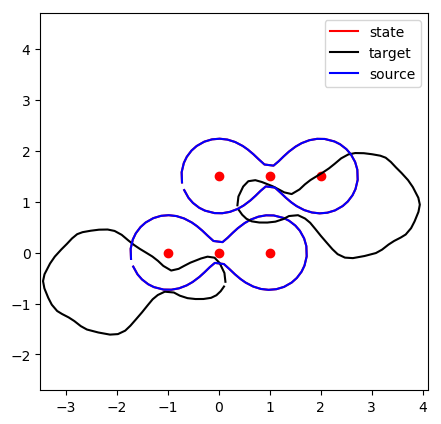

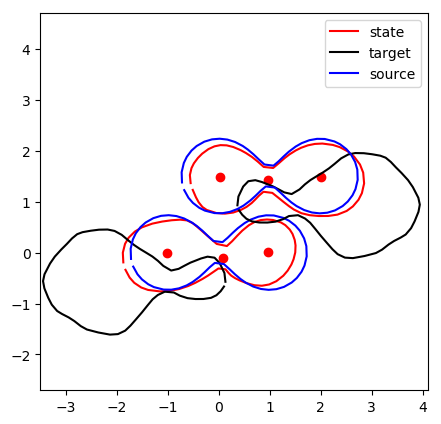

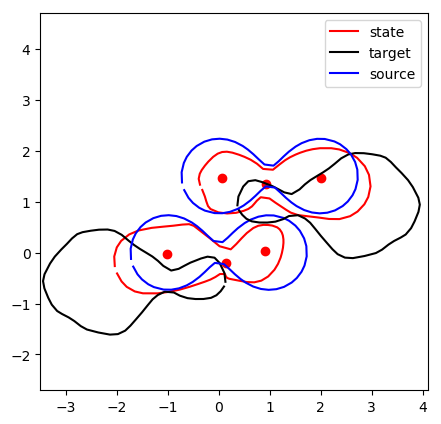

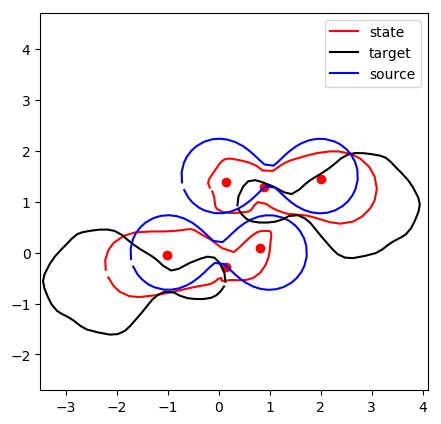

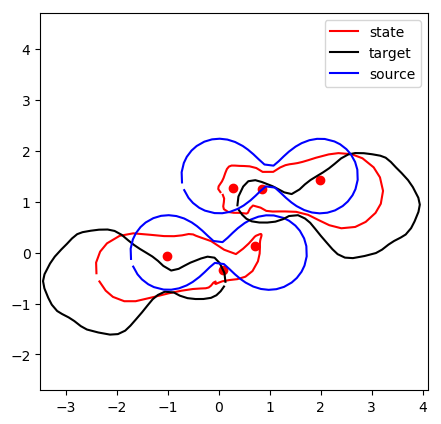

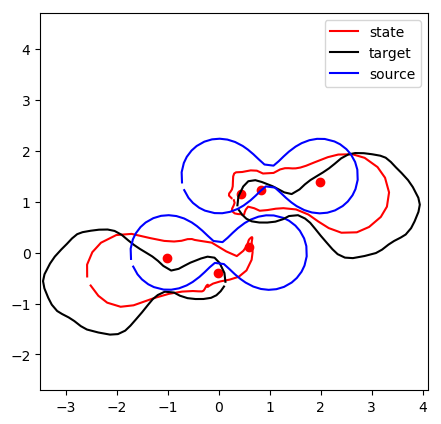

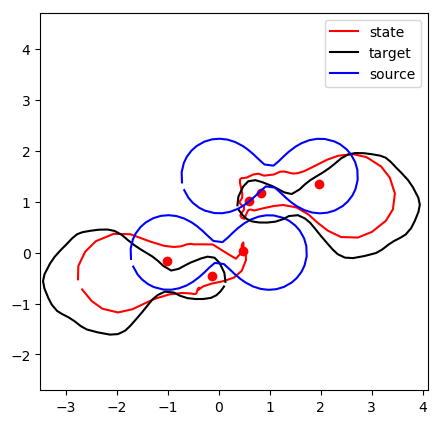

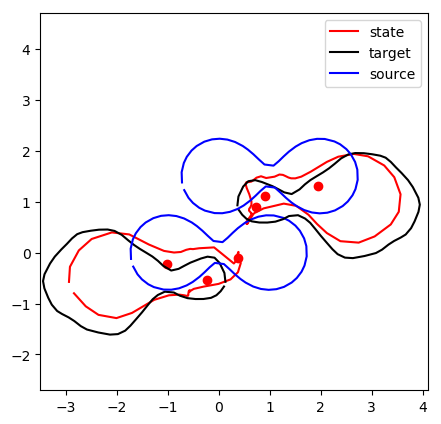

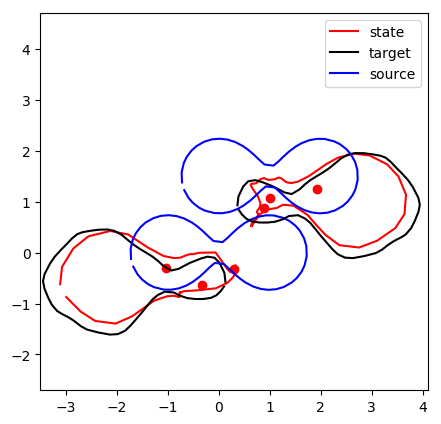

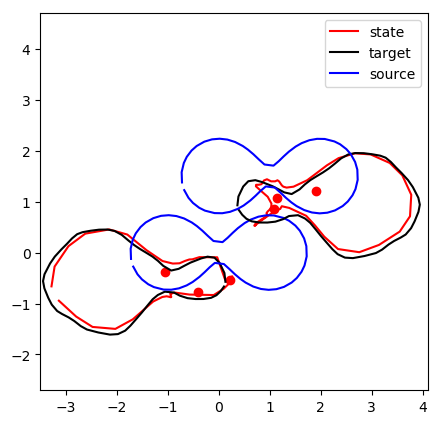

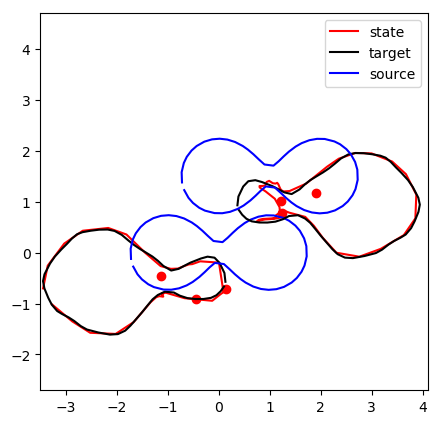

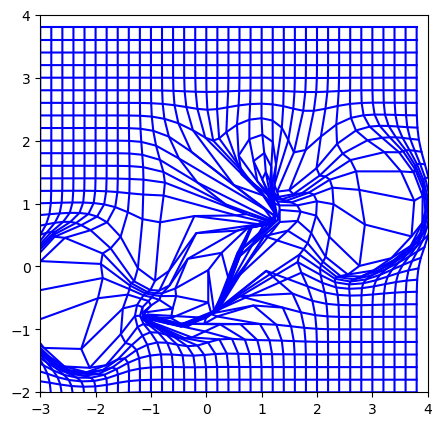

In [137]:
xlim = [-3, 4]
ylim = [-2,4]
d = [0.2, 0.2]
#_ = save.gridpoints(xlim, ylim, d)
#save.fig_grid(True)

save.save('../results/Nuts-Multi/Compound/' ,axeslim = [-3.5,4.1,-2,4], plot_gd=['plot', 'plot', 'scatter', 'scatter'])

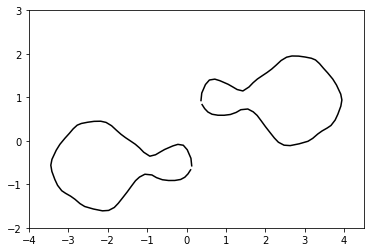

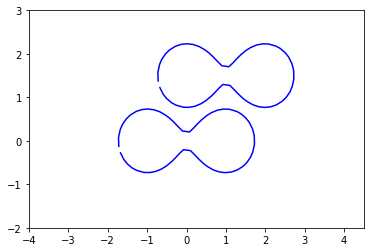

In [114]:
xlim = [-4, 4.5]
ylim = [-2,3]

fig_target = plt.figure()
plt_target = plt.plot(target[0][:,0].detach().numpy(), target[0][:, 1].detach().numpy(), c='k')
plt_target = plt.plot(target[1][:,0].detach().numpy(), target[1][:, 1].detach().numpy(), c='k')
#plt.legend((plt_target[0],),('target',))
axes = plt.gca()
axes.set_xlim(xlim)
axes.set_ylim(ylim)

fig_source = plt.figure()
plt_source = plt.plot(source[0][:, 0].detach().numpy(), source[0][:, 1].detach().numpy(), c='b')
plt_source = plt.plot(source[1][:, 0].detach().numpy(), source[1][:, 1].detach().numpy(), c='b')
#plt.legend(( plt_source[0],),('source',))
axes = plt.gca()
axes.set_xlim(xlim)
axes.set_ylim(ylim)
plt.show()

In [116]:
fig_source.savefig('../results/Nuts-Multi/source.png')
fig_target.savefig('../results/Nuts-Multi/target.png')

In [ ]:
def test_gradcheck_Hamiltonian():
    def hamiltonian(gd, mom):
        
        H.module.manifold.fill_gd(gd)
        H.module.manifold.fill_cotan(mom)
        H.geodesic_controls()
        return H()
    
    return torch.autograd.gradcheck(hamiltonian, (gd, mom), raise_exception=True)

gd = torch.cat(H.module.manifold.unroll_gd().copy()).requires_grad_().view(-1)
mom = torch.cat(H.module.manifold.unroll_cotan().copy()).requires_grad_().view(-1)


test_gradcheck_Hamiltonian()